# Demonstrate how to load Casual MNIST dataset

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch

import matplotlib.pyplot as plt
import numpy as np

from ciflows.datasets.causalmnist import MultiDistrDataModule

/Users/adam2392/miniforge3/envs/ciflows/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/adam2392/miniforge3/envs/ciflows/lib/python3.11/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/adam2392/miniforge3/envs/ciflows/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <EB3FF92A-5EB1-3EE8-AF8B-5923C1265422> /Users/adam2392/miniforge3/envs/ciflows/lib/python3.11/site-packages/torchvision/image.so
  Reason: tried: '/Users/adam2392/miniforge3/envs/ciflows/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/adam2392/miniforge3/envs/ciflows/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/adam2

In [4]:
# output filename for the results
root = "/Users/adam2392/pytorch_data/"
graph_type = 'collider'
batch_size = 32
num_workers = 2
fast_dev = True

# demo to load dataloader. please make sure transform is None. d
data_module = MultiDistrDataModule(
    root=root,
    graph_type=graph_type,
    batch_size=batch_size,
    stratify_distrs=True,
    num_workers=num_workers,
    fast_dev_run=fast_dev,
)
data_module.setup()

/Users/adam2392/Documents/ciflows/ciflows/datasets/causalmnist.py:208: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data = torch.load(
/Users/adam2392/Documents/ciflow

In [5]:
# sample a batch
for img, meta_label, target in data_module.train_dataloader():
    print(img.shape, meta_label.shape, target.shape)
    break

/Users/adam2392/miniforge3/envs/ciflows/lib/python3.11/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/adam2392/miniforge3/envs/ciflows/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <EB3FF92A-5EB1-3EE8-AF8B-5923C1265422> /Users/adam2392/miniforge3/envs/ciflows/lib/python3.11/site-packages/torchvision/image.so
  Reason: tried: '/Users/adam2392/miniforge3/envs/ciflows/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/adam2392/miniforge3/envs/ciflows/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/adam2392/miniforge3/envs/ciflows/lib/python3.11/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/adam2392/miniforge3/envs/ciflows/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warnin

torch.Size([32, 3, 32, 32]) torch.Size([32, 4]) torch.Size([32, 3])


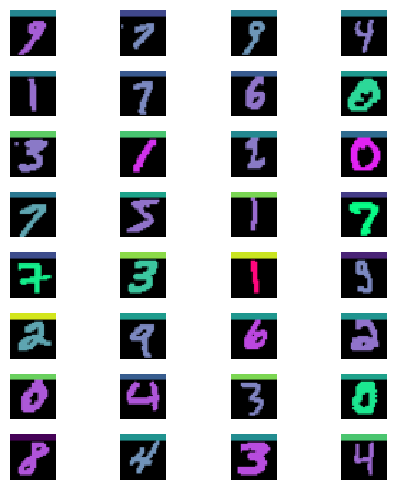

In [7]:
images = img
# Normalize: Ensure values are in [0, 1]
min_val = torch.min(images)
max_val = torch.max(images)
images = (images - min_val) / (max_val - min_val)

# Convert to NumPy and transpose to (H, W, C)
images = images.permute(0, 2, 3, 1).numpy()

# Convert to [0, 255] for visualization
images = (images * 255).astype(np.uint8)
img = images

# Visualize generated samples
fig, axes = plt.subplots(batch_size // 4, 4, figsize=(5, 5))
for i in range(batch_size):
    ax = axes[i // 4, i % 4]
    image = img[i]

    # # Normalize: Ensure values are in [0, 1]
    # min_val = torch.min(image)
    # max_val = torch.max(image)
    # image = (image - min_val) / (max_val - min_val)

    # # Convert to NumPy and transpose to (H, W, C)
    # image = image.permute(1, 2, 0).numpy()

    # # Convert to [0, 255] for visualization
    # image = (image * 255).astype(np.uint8)
    
    ax.imshow(image, interpolation="nearest")
    ax.axis('off')

fig.tight_layout()
plt.show()

In [17]:
import xarray as xr
column_labels = ["digit", "color_digit", "color_bar", "distr_idx"]
meta_label = torch.atleast_2d(meta_label)
meta_arr = xr.DataArray(meta_label, dims=['rows', 'columns'], coords={'columns': column_labels})
print(meta_arr)

<xarray.DataArray (rows: 32, columns: 4)> Size: 512B
array([[ 0.        ,  0.86573404,  0.3473225 ,  0.        ],
       [ 0.        ,  0.5010871 ,  0.34152502,  0.        ],
       [ 4.        ,  0.60099095,  0.7109989 ,  0.        ],
       [ 0.        ,  0.10920152,  0.56604916,  0.        ],
       [ 1.        , -0.02850018,  0.9132071 ,  0.        ],
       [ 9.        ,  0.771244  ,  0.46500462,  0.        ],
       [ 7.        ,  0.51905525,  0.29345092,  0.        ],
       [ 0.        ,  0.60931116,  0.79072773,  0.        ],
       [ 4.        ,  0.6627616 ,  0.37769157,  0.        ],
       [ 9.        ,  0.4583834 ,  0.6576028 ,  0.        ],
       [ 1.        ,  0.3735245 ,  0.78802526,  0.        ],
       [ 5.        ,  0.558648  ,  0.56784064,  0.        ],
       [ 2.        ,  0.48983634,  0.3112888 ,  0.        ],
       [ 8.        ,  0.7775664 ,  0.0203176 ,  0.        ],
       [ 6.        ,  0.7236744 ,  0.5187168 ,  0.        ],
       [ 2.        ,  0.5565179 

In [23]:
target_arr = xr.DataArray(target, dims=['rows', 'nodes'], coords={'rows': np.arange(target.shape[0]), 'nodes': np.arange(target.shape[1])})

print(target_arr.loc['rows1', 'nodes0'])

KeyError: "not all values found in index 'rows'. Try setting the `method` keyword argument (example: method='nearest')."